In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [10]:
df = pd.DataFrame({'X1':[2.7810836,1.465489372,3.396561688,1.38807019,3.06407232,7.627531214,5.332441248,6.922596716,8.675418651,7.673756466],
                   'X2':[2.550537003,2.362125076,4.400293529,1.850220317,3.005305973,2.759262235,2.088626775,1.77106367,80.242068655,3.508563011],
                   'Y':[0,0,0,0,0,1,1,1,1,1]})
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,80.242069,1
9,7.673756,3.508563,1


In [34]:
def sigmoid(x):
    """compute sigmoid output for a given input, given w= 0.5, b=0 """
    w=0.5
    b=0
    return 1/(1 + np.exp(-(w*x + b)))

In [36]:
#x=1
sigmoid(1)

0.6224593312018546

In [37]:
def sigmoid(x,w,b):
    """compute sigmoid of input x for different w,b"""
    return 1/(1 + np.exp(-(w*x + b)))

In [38]:
#x=1, w=0.5, b=0
sigmoid(1,0.5,0)

0.6224593312018546

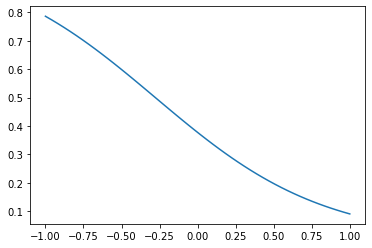

In [49]:
w = -1.8
b = -0.5
X = np.linspace(-1,1,50)         #50 data points between [-1,1]
Y = sigmoid(X,w,b)               #after applying activation function on X

plt.plot(X,Y)
plt.show()

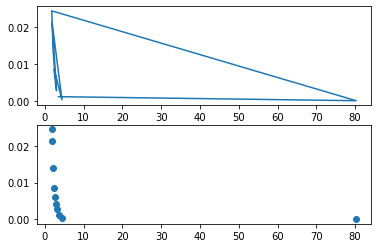

In [95]:
#rough work, please ignore
w = -1.8
b = -0.5
X = X2
Y = sigmoid(X,w,b)
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.plot(X,Y)
ax2.scatter(X,Y)
plt.show()

In [68]:
X2 = np.array([i for i in df['X2']])

Text(0.5, 1.0, 'sigmoid of df [X2]')

<Figure size 1224x576 with 0 Axes>

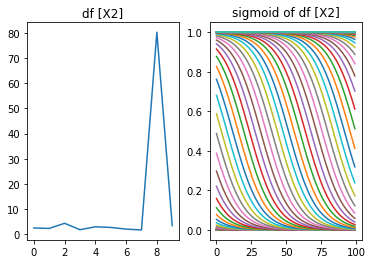

In [126]:
#rough work, please ignore
fig = plt.figure(figsize=(17,8))
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(X)
ax1.set_title('df [X2]')
ax2.plot(Y)
ax2.set_title('sigmoid of df [X2]')

Sigmoid on two input values

$S_{w_1,w_2,b}(x_1,x_2) = \frac {1}{1+ e^{-(w_1x_1+w_2x_2)+b)}}$

In [118]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/ (1+ np.exp(-(w1*x1+w2*x2+b)))

In [123]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [119]:
X1 = np.linspace(-10,10,100)       #X1 = 100 points
X2 = np.linspace(-10,10,100)       #X2 = 100 points

XX1,XX2 = np.meshgrid(X1,X2)       #100x100--> combination meshgrid of X1, X2

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [362]:
w1=2
w2=-0.5
b=0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)
Y.shape

(100, 100)

In [121]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('',['red','yellow','green'])

<function matplotlib.pyplot.show(*args, **kw)>

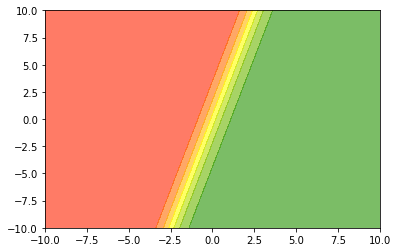

In [363]:
#2d graph
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show

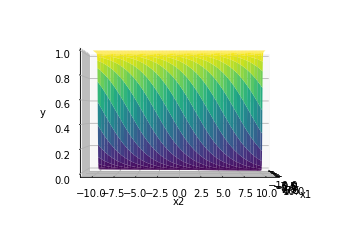

In [173]:
#3d graph
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(0,0) 

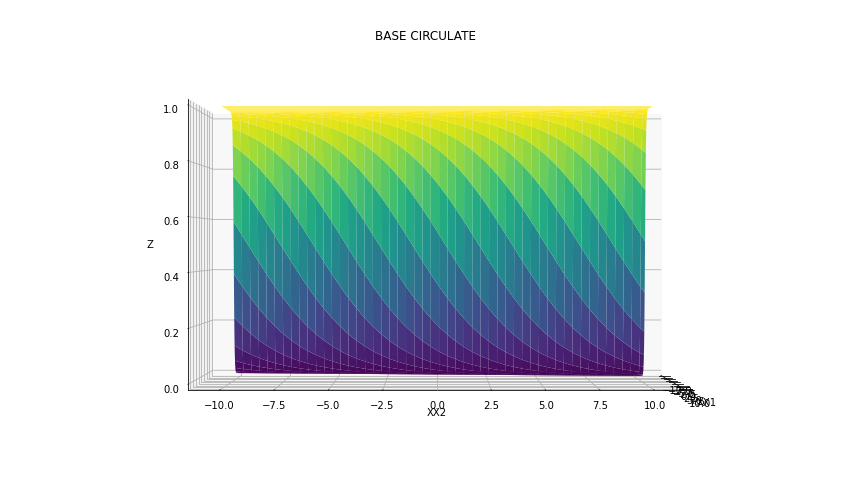

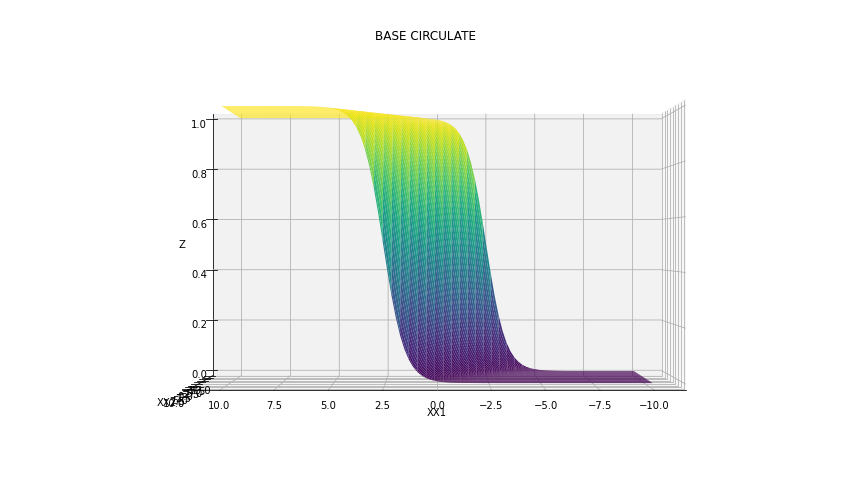

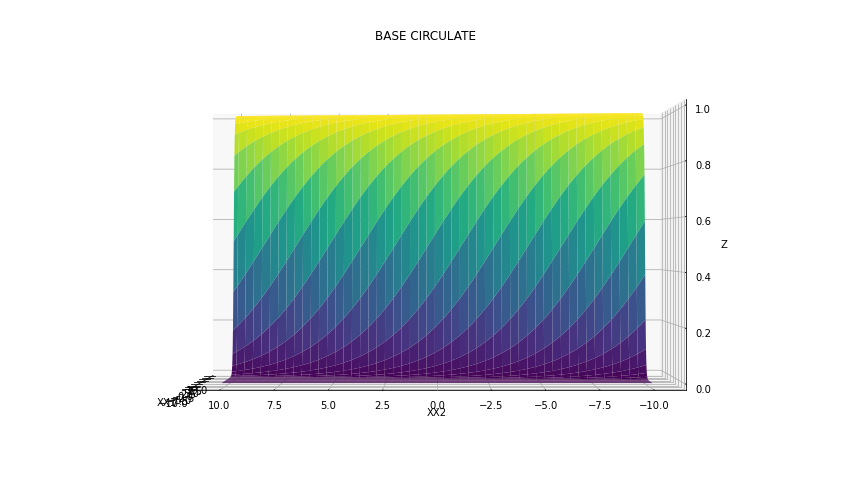

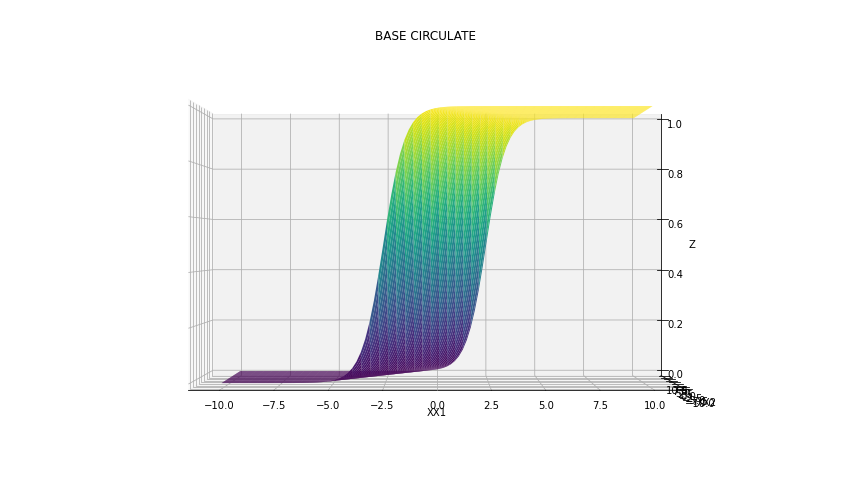

In [366]:
#different views of a graph on interval [0,90,180,270]
for angle in range(0,360,90):
    #fig,ax = plt.subplots(2,2)
    fig = plt.figure(figsize=(15,9))
    ax = plt.axes(projection = '3d')
    ax.plot_surface(XX1,XX2,Y,cmap='viridis')
    
    ax.view_init(0,angle)
    
    ax.set_xlabel('XX1')
    ax.set_ylabel('XX2')
    ax.set_zlabel('Z')
    ax.set_title('BASE CIRCULATE')

COMPUTE LOSS for a given dataset
* data - X, y
* activation function- sigmoid - y_hat
* loss function - np.sum((y-y_hat)**2))
* performance metrics- accuracy

In [179]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20 - 10
X.shape

(25,)

In [180]:
Y = sigmoid(X,w_unknown,b_unknown)
Y.shape

(25,)

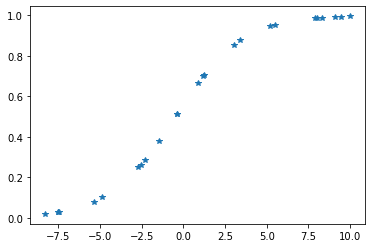

In [181]:
plt.plot(X,Y,'*')

In [182]:
def calulate_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(x,w_est,b_est)) ** 2
    return loss

In [205]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW,BB = np.meshgrid(W,B)
print(f'w shape{WW.shape}') 
print(f'b shape{BB.shape}')

w shape(101, 101)
b shape(101, 101)


In [236]:
Loss = np.zeros(WW.shape)
Loss.shape

(101, 101)

In [240]:
print(f'X shape{X.shape}')
print(f'Y shape{Y.shape}')
for i in range(101):
    for j in range(101):
        Loss[i,j]=calulate_loss(X,Y,WW[i,j],BB[i,j])
print(f'Loss shape {Loss.shape}')

X shape(25,)
Y shape(25,)
Loss shape (101, 101)


In [271]:
Loss.shape

(101, 101)

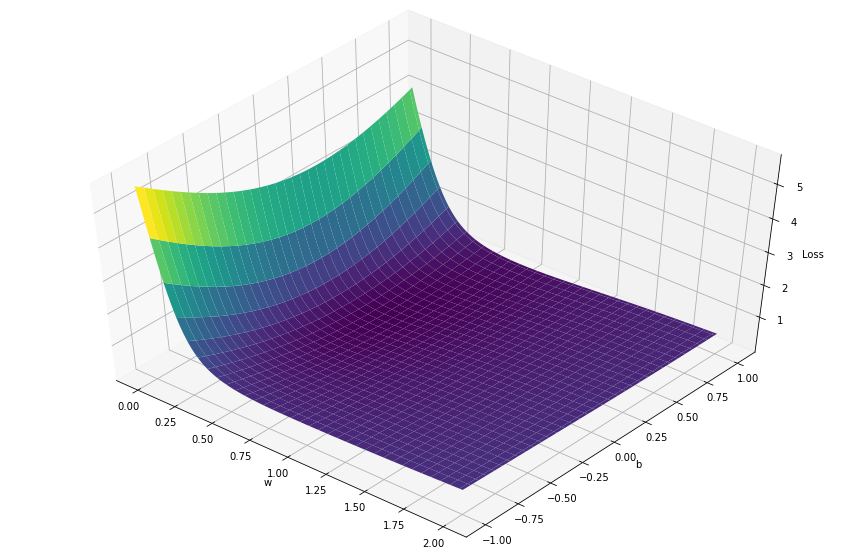

In [344]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(50,-50)

In [289]:
ij = np.argmin(Loss)
print('ij is',ij)
print('loss shape os',Loss.shape[1])
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print(i,j)

ij is 6287
loss shape os 101
62 25


In [291]:
#these are values of w=0.5, b=0.24 which approximates underlying representation of given inputs.
print(WW[i,j],BB[i,j])

0.5 0.24
